# [Метрики центральности](https://networkx.github.io/documentation/networkx-1.10/reference/algorithms.centrality.html)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx 

Будем работать с очень известным [датасетом](https://en.wikipedia.org/wiki/Zachary%27s_karate_club):

In [4]:
G = nx.karate_club_graph()

dg=[d for node, d in G.degree()]

pos=nx.spring_layout(G,iterations=10)

In [23]:
def draw_(G,pos, metrics,tit):
    norm=1000/np.max(metrics)
    options = {
    'with_labels':True,
    'node_color': [v * norm for v in metrics],
    'node_size': [v * norm for v in metrics],
    'line_color': 'grey',
    'linewidths': 0.5,
    'width': 0.5,
    'cmap': 'YlGnBu'
    }
    nx.draw(G,pos, **options)
    plt.title(tit)

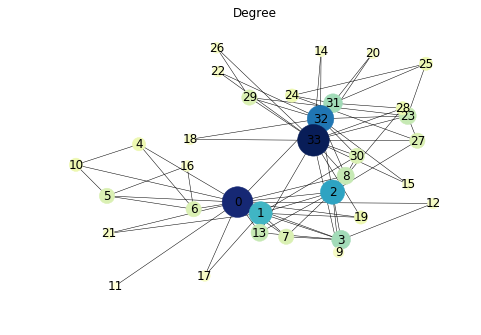

In [26]:
draw_(G,pos,dg,'Degree')

In [27]:
d_cent=list(nx.degree_centrality(G).values())

[0.48484848484848486, 0.2727272727272727, 0.30303030303030304, 0.18181818181818182, 0.09090909090909091, 0.12121212121212122, 0.12121212121212122, 0.12121212121212122, 0.15151515151515152, 0.06060606060606061, 0.09090909090909091, 0.030303030303030304, 0.06060606060606061, 0.15151515151515152, 0.06060606060606061, 0.06060606060606061, 0.06060606060606061, 0.06060606060606061, 0.06060606060606061, 0.09090909090909091, 0.06060606060606061, 0.06060606060606061, 0.06060606060606061, 0.15151515151515152, 0.09090909090909091, 0.09090909090909091, 0.06060606060606061, 0.12121212121212122, 0.09090909090909091, 0.12121212121212122, 0.12121212121212122, 0.18181818181818182, 0.36363636363636365, 0.5151515151515151]


In [31]:
c_cent=list(nx.closeness_centrality(G).values())
b_cent=list(nx.betweenness_centrality(G).values())
e_cent=list(nx.eigenvector_centrality(G).values())

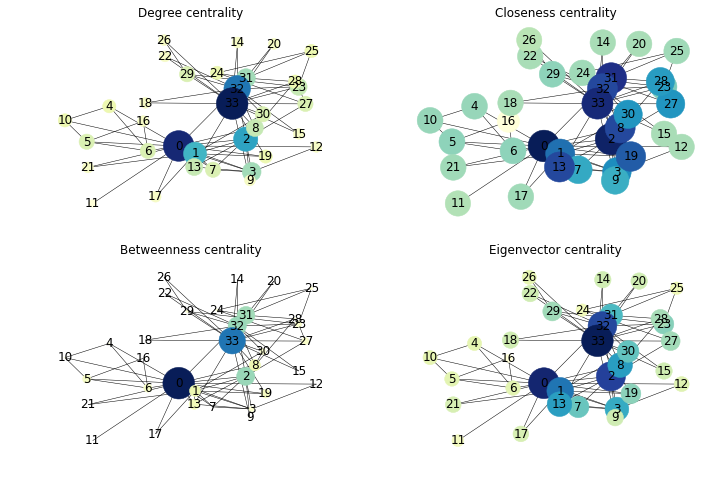

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12, 8))
plt.subplot(221)
draw_(G,pos, d_cent,'Degree centrality')
plt.subplot(222)
draw_(G,pos, c_cent,'Closeness centrality')
plt.subplot(223)
draw_(G,pos, b_cent,'Betweenness centrality')
plt.subplot(224)
draw_(G,pos, e_cent,'Eigenvector centrality')

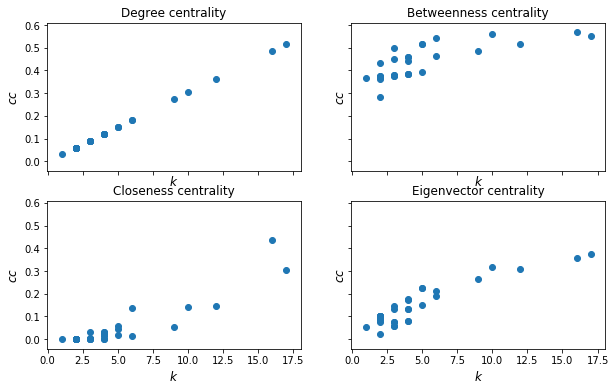

In [39]:
fig, axes = plt.subplots(nrows=2, ncols=2,sharex=True, sharey=True, figsize=(10, 6))

axes[0,0].scatter(dg, d_cent)
axes[0,0].set_title('Degree centrality')
axes[0,1].scatter(dg, c_cent)
axes[1,0].set_title('Closeness centrality')
axes[1,0].scatter(dg, b_cent)
axes[0,1].set_title('Betweenness centrality')
axes[1,1].scatter(dg, e_cent)
axes[1,1].set_title('Eigenvector centrality')
for i in range(2):
    for j in range(2):
        axes[i,j].set_xlabel(r'$ k$', fontsize=12)
        axes[i,j].set_ylabel(r'$cc$', fontsize=12)

# [PageRank](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html)

In [40]:
pr=nx.pagerank(G, alpha=0.85)
print(pr)

{0: 0.09700181758983709, 1: 0.05287839103742701, 2: 0.057078423047636745, 3: 0.03586064322306479, 4: 0.021979406974834498, 5: 0.02911334166344221, 6: 0.02911334166344221, 7: 0.024490758039509182, 8: 0.029765339186167028, 9: 0.014308950284462801, 10: 0.021979406974834498, 11: 0.009564916863537148, 12: 0.014645186487916191, 13: 0.029536314977202986, 14: 0.014535161524273825, 15: 0.014535161524273825, 16: 0.016785378110253487, 17: 0.014558859774243493, 18: 0.014535161524273825, 19: 0.019604416711937293, 20: 0.014535161524273825, 21: 0.014558859774243493, 22: 0.014535161524273825, 23: 0.03152091531163228, 24: 0.021075455001162945, 25: 0.021005628174745786, 26: 0.015043395360629753, 27: 0.025638803528350497, 28: 0.01957296050943854, 29: 0.02628726283711208, 30: 0.02458933653429248, 31: 0.03715663592267942, 32: 0.07169213006588289, 33: 0.1009179167487121}


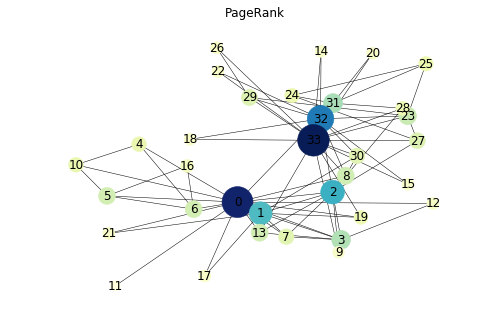

In [42]:
draw_(G,pos, list(pr.values()),'PageRank')

## Немного простых примеров 

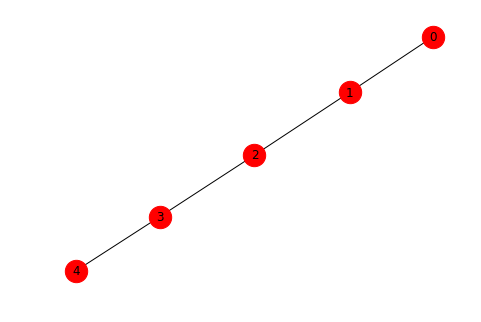

In [43]:
P=nx.path_graph(5)
nx.draw(P,node_size=500,with_labels=True)

Сделаем таблицу со значениями всех центральностей:

In [44]:
import pandas as pd

In [45]:
def centrality_table(G):
    df = pd.DataFrame(columns=['degree_centrality', 'closeness_centrality', 
                           'betweenness_centrality', 'eigenvector_centrality', 'PageRank'],
                      index=list(G.nodes()))
    df['degree_centrality']=list(nx.degree_centrality(G).values())
    df['closeness_centrality']=list(nx.closeness_centrality(G).values())
    df['betweenness_centrality']=list(nx.betweenness_centrality(G).values())
    df['eigenvector_centrality']=list(nx.eigenvector_centrality(G).values())
    df['PageRank']=list(nx.pagerank(G,alpha=0.85).values())
    return df

In [46]:
centrality_table(P)

,degree_centrality,closeness_centrality,betweenness_centrality,eigenvector_centrality,PageRank
0,0.25,0.400000,0.000000,0.288676,0.134527
1,0.50,0.571429,0.500000,0.500000,0.245945
2,0.50,0.666667,0.666667,0.577349,0.239055
3,0.50,0.571429,0.500000,0.500000,0.245945
4,0.25,0.400000,0.000000,0.288676,0.134527


,degree_centrality,closeness_centrality,betweenness_centrality,eigenvector_centrality,PageRank
0,1.0,1.000000,1.0,0.707106,0.472972
1,0.2,0.555556,0.0,0.316228,0.105406
2,0.2,0.555556,0.0,0.316228,0.105406
3,0.2,0.555556,0.0,0.316228,0.105406
4,0.2,0.555556,0.0,0.316228,0.105406
5,0.2,0.555556,0.0,0.316228,0.105406


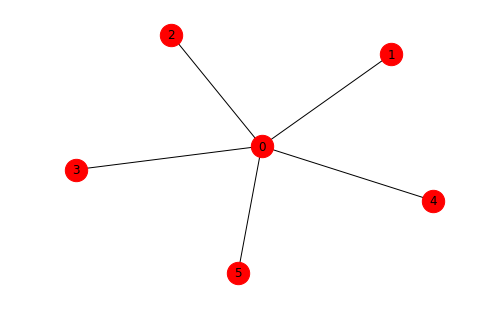

In [39]:
ST=nx.star_graph(5)
nx.draw(ST,node_size=500,with_labels=True)
centrality_table(ST)

In [268]:
list(BR.nodes())

[0, 1, 2, 4, 5, 6, 3]

,degree_centrality,closeness_centrality,betweenness_centrality,eigenvector_centrality,PageRank
0,0.4,0.400000,0.000000,0.305221,0.090384
1,0.4,0.400000,0.000000,0.305221,0.090384
2,0.4,0.400000,0.000000,0.305221,0.090384
3,0.4,0.400000,0.000000,0.305221,0.090384
4,0.5,0.526316,0.533333,0.337417,0.112517
6,0.5,0.526316,0.533333,0.337417,0.112517
7,0.4,0.400000,0.000000,0.305221,0.090384
8,0.4,0.400000,0.000000,0.305221,0.090384
9,0.4,0.400000,0.000000,0.305221,0.090384
10,0.4,0.400000,0.000000,0.305221,0.090384


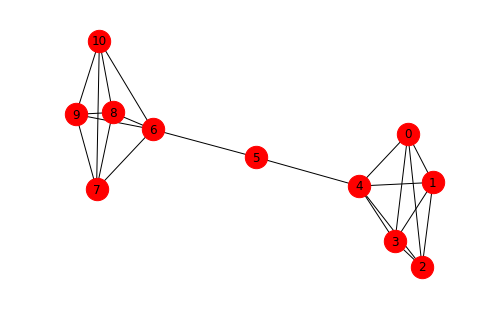

In [56]:
BR=nx.barbell_graph(5,1)
nx.draw(BR,node_size=500,with_labels=True)
centrality_table(BR)

In [4]:
T=nx.DiGraph()

In [5]:
T.add_nodes_from([1,2,3,4,5])
T.add_edge(1,2)
T.add_edge(3,2)

In [6]:
nx.pagerank(T)

{1: 0.14925385244522876,
 2: 0.40298459021908517,
 3: 0.14925385244522876,
 4: 0.14925385244522876,
 5: 0.14925385244522876}